In [21]:
import torch
import pyvista as pv 
import  numpy as np 



num_pc = 10 
point_size = 5

interp = torch.load("./results/interpolation/linear_airplane.pt").cpu().numpy()
steps = np.linspace(0,99,num=10,endpoint=True).astype(int)

print(len(steps))

interp = interp[steps]





10


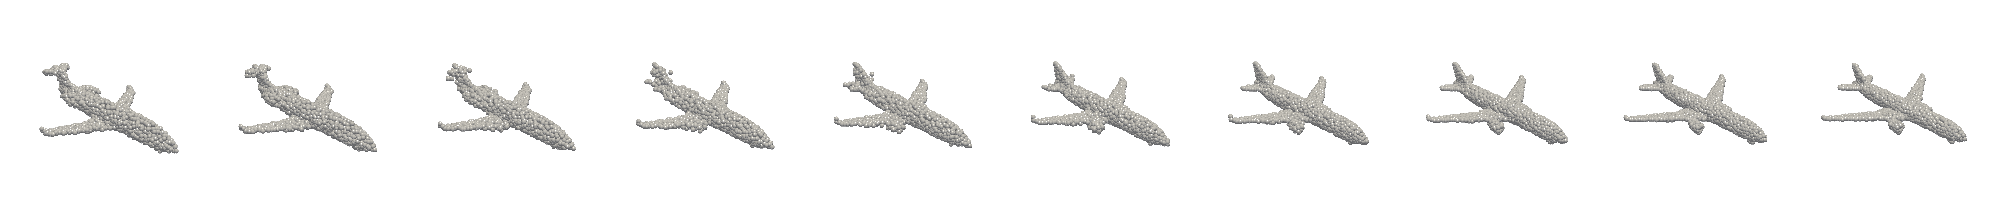

In [29]:
pl = pv.Plotter(
    shape=(1, num_pc),
    window_size=[200 * num_pc, 200],
    border=False,
    polygon_smoothing=True,
)

for col in range(num_pc):
    # First plat
    pl.subplot(0, col)
    actor = pl.add_points(
        interp[col].reshape(-1, 3),
        style="points",
        emissive=False,
        show_scalar_bar=False,
        render_points_as_spheres=True,
        color="lightgray",
        point_size=point_size,
        ambient=0.2,
        diffuse=0.8,
        specular=0.8,
        specular_power=40,
        smooth_shading=True,
    )

pl.background_color = "w"
pl.link_views()
pl.camera_position = "xy"
pos = pl.camera.position
pl.camera.position = (pos[0], pos[1] + 3, pos[2])
pl.camera.position = (10, 0, 0)
pl.camera.azimuth = 45
pl.camera.elevation = 30
# create a top down light
light = pv.Light(
    position=(0, 0, 0), positional=True, cone_angle=50, exponent=20, intensity=0.2
)
pl.add_light(light)
pl.camera.zoom(0.7)
pl.show(return_img=True)
pl.save_graphic("./figures/interpolation/airplane.pdf")  
